In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

# Data Questions

1) As you request more RAM, how does that impact your queue time?

2) As you request more wall time, how does that impact your queue time?

3) Are there nodes that fail more often than others?
** ignore cases where multiple nodes are used

4) Are there users who are clogging up the flow by running too many small jobs? Greater than 500 jobs, each less than 5 minutes, within 4 hours

accre = pd.read_fwf('')

In [3]:
accre = pd.read_table('data/july-2017-thru-june-2018.txt', sep = "|", dtype=str)

In [4]:
accre.head()

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
0,15806649,15806649,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,WOODWARD_TCP-x-228324-x-228324-x-301-x-Multi_A...
1,15806664,15806664,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,WOODWARD_TCP-x-115174-x-115174-x-301-x-Multi_A...
2,15806670,15806670,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,WOODWARD_TCP-x-215607-x-215607-x-301-x-Multi_A...
3,15806671,15806671,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,WOODWARD_TCP-x-116214-x-116214-x-1701-x-Multi_...
4,15811617,15811617,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01T05:00:00,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_aa7c22e04f21


In [5]:
accre.columns

Index(['JobID', 'JobIDRaw', 'Cluster', 'Partition', 'Account', 'Group', 'GID',
       'User', 'UID', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed',
       'ExitCode', 'State', 'NNodes', 'NCPUS', 'ReqCPUS', 'ReqMem', 'ReqGRES',
       'ReqTRES', 'Timelimit', 'NodeList', 'JobName'],
      dtype='object')

In [6]:
accre.shape

(12499389, 25)

### 1) As you request more RAM, how does that impact your queue time?

In [7]:
### Random sample with numpy
indices = np.random.randint(0,len(accre),5000)
accre_subset = accre.iloc[indices]

In [8]:
accre_subset.head()

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
2283255,18087211_1663,18103447,accre,production,p_csb_meiler,p_csb_meiler,59420,sotocs,574202,2017-09-14T19:51:23,...,COMPLETED,1,1,1,10Gn,NaN,"cpu=1,mem=10G,node=1",02:00:00,vmp228,00096
11245372,27074093,27074093,accre,production,cms,cms,31000,cmsglidein,NaN,2018-05-04T18:31:47,...,CANCELLED by 29607,1,1,1,5000Mn,NaN,"cpu=1,mem=5000M,node=1",2-00:00:00,None assigned,bl_43b100b181b1
3402487,19231279,19231279,accre,production,stassun,stassun,36050,jacklisr,233674,2017-09-28T17:06:22,...,CANCELLED by 233674,1,8,8,2000Mn,NaN,"cpu=8,mem=2000M,node=1",00:03:00,None assigned,KELT_/dors/stassunlab/kelt/nkelt/tess_gi_scvz/...
5910359,21736072_93,21739289,accre,production,beam_lab,beam_lab,59350,deik,207302,2017-11-24T22:24:26,...,COMPLETED,1,1,1,16000Mn,NaN,"cpu=1,mem=16000M,node=1",2-12:00:00,vmp1262,run.bat
2696366,18432937_13407,18516558,accre,production,p_csb_meiler,p_csb_meiler,59420,sotocs,574202,2017-09-16T02:47:44,...,COMPLETED,1,1,1,10Gn,NaN,"cpu=1,mem=10G,node=1",02:00:00,vmp1375,00089


In [16]:
accre_q1 = accre_subset.drop(columns=['JobIDRaw', 'Cluster', 'Partition', 'Account', 'Group', 'GID',
       'User', 'UID', 'Eligible', 'End', 'Elapsed',
       'ExitCode', 'State', 'NNodes', 'NCPUS', 'ReqCPUS', 'ReqMem', 'ReqGRES',
       'ReqTRES', 'Timelimit', 'NodeList', 'JobName'])
accre_q1.head()

,JobID,Submit,Start
2283255,18087211_1663,2017-09-14T19:51:23,2017-09-14T20:35:05
11245372,27074093,2018-05-04T18:31:47,2018-05-04T19:30:11
3402487,19231279,2017-09-28T17:06:22,2017-09-28T18:39:19
5910359,21736072_93,2017-11-24T22:24:26,2017-11-24T23:30:46
2696366,18432937_13407,2017-09-16T02:47:44,2017-09-16T06:07:21


In [17]:
from datetime import datetime 

In [18]:
start = pd.to_datetime(accre_q1['Start'])
submit = pd.to_datetime(accre_q1['Submit'])

In [19]:
accre_q1['qtime'] = start-submit
accre_q1.tail()

,JobID,Submit,Start,qtime
10215225,26044146,2018-03-24T09:32:17,2018-03-24T10:28:22,00:56:05
2765035,18560895_3488,2017-09-16T13:15:47,2017-09-16T13:49:54,00:34:07
10187220,26016141,2018-03-23T16:15:39,2018-03-23T16:15:39,00:00:00
3038644,18858837,2017-09-22T02:52:00,2017-09-22T03:50:34,00:58:34
9473955,25302876,2018-03-01T15:05:24,2018-03-01T15:57:29,00:52:05


In [20]:
accre_q1['hour']=accre_q1.qtime.dt.total_seconds()/60/60
##(df['col'].dt.total_seconds())
accre_q1.tail()

,JobID,Submit,Start,qtime,hour
10215225,26044146,2018-03-24T09:32:17,2018-03-24T10:28:22,00:56:05,0.934722
2765035,18560895_3488,2017-09-16T13:15:47,2017-09-16T13:49:54,00:34:07,0.568611
10187220,26016141,2018-03-23T16:15:39,2018-03-23T16:15:39,00:00:00,0.000000
3038644,18858837,2017-09-22T02:52:00,2017-09-22T03:50:34,00:58:34,0.976111
9473955,25302876,2018-03-01T15:05:24,2018-03-01T15:57:29,00:52:05,0.868056


In [21]:
qtime=accre_q1.drop(labels=['Submit', 'Start', 'qtime'], axis=1)
qtime.head()

,JobID,hour
2283255,18087211_1663,0.728333
11245372,27074093,0.973333
3402487,19231279,1.549167
5910359,21736072_93,1.105556
2696366,18432937_13407,3.326944


In [22]:
### Craeting data frame of RAM Requested
ramreq = accre_subset.drop(columns=['JobIDRaw', 'Cluster', 'Partition', 'Account', 'Group', 'GID',
       'User', 'UID', 'Eligible', 'End', 'Elapsed',
       'ExitCode', 'State', 'NNodes', 'NCPUS', 'ReqCPUS', 'ReqGRES',
       'ReqTRES', 'Timelimit', 'NodeList', 'JobName','JobID', 'Submit', 'Start'])
ramreq.head()
ramreq.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 2283255 to 9473955
Data columns (total 1 columns):
ReqMem    5000 non-null object
dtypes: object(1)
memory usage: 78.1+ KB


In [23]:
ramreq.head()

,ReqMem
2283255,10Gn
11245372,5000Mn
3402487,2000Mn
5910359,16000Mn
2696366,10Gn


In [24]:
ramreq['col1'] = ramreq['ReqMem'].str[-2:]
ramreq['col2'] = ramreq['ReqMem'].str[:-2]
ramreq.head()

,ReqMem,col1,col2
2283255,10Gn,Gn,10
11245372,5000Mn,Mn,5000
3402487,2000Mn,Mn,2000
5910359,16000Mn,Mn,16000
2696366,10Gn,Gn,10


In [25]:
## Did not work
##mapping = {'Mn': 1, 'Mc': 1, 'Gc' : 1024, 'Gn': 1024}

##ramreq.replace({'Mn': mapping, 'Mc': mapping,'Gc': mapping, 'Gn': mapping })

In [26]:
## Did not work
##ramreq['col3'] = ramreq.apply(lambda row: (row['col1']*row['col2']), axis = 1)

In [27]:
## This is working too:
mymap = {'Mn': 0.001, 'Mc': 0.001, 'Gc' : 1, 'Gn': 1, '0n':0}

ramreq_1=ramreq.applymap(lambda s: mymap.get(s) if s in mymap else s)
ramreq_1.head()

##print(ramreq_1.loc[[6977652]])

,ReqMem,col1,col2
2283255,10Gn,1.000,10
11245372,5000Mn,0.001,5000
3402487,2000Mn,0.001,2000
5910359,16000Mn,0.001,16000
2696366,10Gn,1.000,10


In [28]:
ramreq_1['col1_nm'] = pd.to_numeric(ramreq_1['col1'])
ramreq_1['col2_nm'] = pd.to_numeric(ramreq_1['col2'])
ramreq_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 2283255 to 9473955
Data columns (total 5 columns):
ReqMem     5000 non-null object
col1       5000 non-null float64
col2       5000 non-null object
col1_nm    5000 non-null float64
col2_nm    4944 non-null float64
dtypes: float64(3), object(2)
memory usage: 234.4+ KB


In [29]:
ramreq_1['Memory']= ramreq_1.col1_nm*ramreq_1.col2_nm
ramreq_1.head()

##print(ramreq_2.loc[[11192342]])


,ReqMem,col1,col2,col1_nm,col2_nm,Memory
2283255,10Gn,1.000,10,1.000,10.0,10.0
11245372,5000Mn,0.001,5000,0.001,5000.0,5.0
3402487,2000Mn,0.001,2000,0.001,2000.0,2.0
5910359,16000Mn,0.001,16000,0.001,16000.0,16.0
2696366,10Gn,1.000,10,1.000,10.0,10.0


In [30]:
ramreq_1.describe()

,col1,col1_nm,col2_nm,Memory
count,5000.000000,5000.000000,4944.000000,4944.000000
mean,0.372017,0.372017,7679.513956,11.484564
std,0.482753,0.482753,11427.262199,12.830739
min,0.000000,0.000000,2.000000,0.010000
25%,0.001000,0.001000,10.000000,4.000000
50%,0.001000,0.001000,3050.000000,5.500000
75%,1.000000,1.000000,8000.000000,16.000000
max,1.000000,1.000000,120000.000000,216.000000


In [31]:
ramreq_1.head()

,ReqMem,col1,col2,col1_nm,col2_nm,Memory
2283255,10Gn,1.000,10,1.000,10.0,10.0
11245372,5000Mn,0.001,5000,0.001,5000.0,5.0
3402487,2000Mn,0.001,2000,0.001,2000.0,2.0
5910359,16000Mn,0.001,16000,0.001,16000.0,16.0
2696366,10Gn,1.000,10,1.000,10.0,10.0


In [32]:
##ramreq=ramreq.astype(float)
##ramreq_1=pd.to_numeric(ramreq_1['col3'])
##ramreq_1.col3.plot()
##plt.show()

In [33]:
ramreq.head()

,ReqMem,col1,col2
2283255,10Gn,Gn,10
11245372,5000Mn,Mn,5000
3402487,2000Mn,Mn,2000
5910359,16000Mn,Mn,16000
2696366,10Gn,Gn,10


In [34]:
qtime.shape

(5000, 2)

In [35]:
ramreq_1.shape

(5000, 6)

In [36]:
#qtime.merge(ramreq_1['Memory']) 
qtime_ramreq = pd.concat((qtime, ramreq_1), axis=1)

qtime_ramreq.head()

,JobID,hour,ReqMem,col1,col2,col1_nm,col2_nm,Memory
2283255,18087211_1663,0.728333,10Gn,1.000,10,1.000,10.0,10.0
11245372,27074093,0.973333,5000Mn,0.001,5000,0.001,5000.0,5.0
3402487,19231279,1.549167,2000Mn,0.001,2000,0.001,2000.0,2.0
5910359,21736072_93,1.105556,16000Mn,0.001,16000,0.001,16000.0,16.0
2696366,18432937_13407,3.326944,10Gn,1.000,10,1.000,10.0,10.0


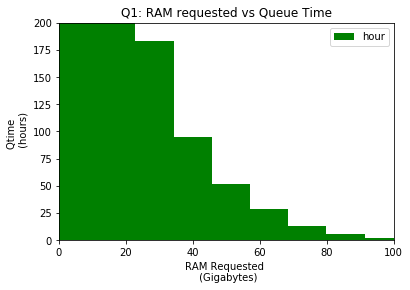

In [39]:
qtime_ramreq.plot(kind='hist', x='Memory', y='hour', bins=50, color='green')
plt.xlim((0,100))
plt.ylim((0,200))
plt.xlabel("RAM Requested \n (Gigabytes)")
plt.ylabel("Qtime \n (hours)")
plt.title("Q1: RAM requested vs Queue Time");


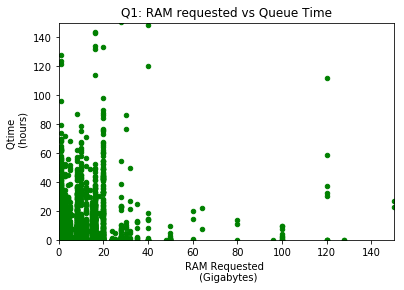

In [40]:
qtime_ramreq.plot(kind='scatter', x='Memory', y='hour', color='green')
plt.xlim((0, 150))
plt.ylim((0,150))
plt.xlabel("RAM Requested \n (Gigabytes)")
plt.ylabel("Qtime \n (hours)")
plt.title("Q1: RAM requested vs Queue Time");

In [41]:
data = qtime_ramreq[['Memory','hour']]
correlation = data.corr(method='pearson')
print(correlation)

          Memory      hour
Memory  1.000000  0.021043
hour    0.021043  1.000000


## 2) As you request more wall time, how does that impact your queue time?

In [42]:
accre_q2 = accre_subset.drop(columns=['JobIDRaw', 'Cluster', 'Partition', 'Account', 'Group', 'GID',
       'User', 'UID', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed',
       'ExitCode', 'State', 'NNodes', 'NCPUS', 'ReqCPUS', 'ReqMem', 'ReqGRES',
       'ReqTRES', 'NodeList', 'JobName'])

accre_q2.head()

,JobID,Timelimit
2283255,18087211_1663,02:00:00
11245372,27074093,2-00:00:00
3402487,19231279,00:03:00
5910359,21736072_93,2-12:00:00
2696366,18432937_13407,02:00:00


In [43]:
accre_q2['H:M:S'] = accre_q2.Timelimit.str[-8:]
accre_q2['days-'] = accre_q2.Timelimit.str[:-8]
accre_q2['days'] = accre_q2['days-'].str[:-1]

In [44]:
accre_q2.head()

,JobID,Timelimit,H:M:S,days-,days
2283255,18087211_1663,02:00:00,02:00:00,,
11245372,27074093,2-00:00:00,00:00:00,2-,2
3402487,19231279,00:03:00,00:03:00,,
5910359,21736072_93,2-12:00:00,12:00:00,2-,2
2696366,18432937_13407,02:00:00,02:00:00,,


In [45]:
accre_q2['days']= pd.to_numeric(accre_q2['days'])

In [46]:
accre_q2.dtypes

JobID         object
Timelimit     object
H:M:S         object
days-         object
days         float64
dtype: object

In [47]:
accre_q2['d2hours']= accre_q2['days']*24
accre_q2.head(1)

,JobID,Timelimit,H:M:S,days-,days,d2hours
2283255,18087211_1663,02:00:00,02:00:00,,NaN,NaN


In [48]:
accre_q2 = accre_q2.fillna(0)
accre_q2.head()

,JobID,Timelimit,H:M:S,days-,days,d2hours
2283255,18087211_1663,02:00:00,02:00:00,,0.0,0.0
11245372,27074093,2-00:00:00,00:00:00,2-,2.0,48.0
3402487,19231279,00:03:00,00:03:00,,0.0,0.0
5910359,21736072_93,2-12:00:00,12:00:00,2-,2.0,48.0
2696366,18432937_13407,02:00:00,02:00:00,,0.0,0.0


In [49]:
accre_q2['seconds'] = accre_q2.Timelimit.str[-2:]
accre_q2['minutes'] = accre_q2.Timelimit.str[-5:-3]
accre_q2['hours'] = accre_q2.Timelimit.str[-8:-6]
accre_q2.head()

,JobID,Timelimit,H:M:S,days-,days,d2hours,seconds,minutes,hours
2283255,18087211_1663,02:00:00,02:00:00,,0.0,0.0,00,00,02
11245372,27074093,2-00:00:00,00:00:00,2-,2.0,48.0,00,00,00
3402487,19231279,00:03:00,00:03:00,,0.0,0.0,00,03,00
5910359,21736072_93,2-12:00:00,12:00:00,2-,2.0,48.0,00,00,12
2696366,18432937_13407,02:00:00,02:00:00,,0.0,0.0,00,00,02


In [50]:
accre_q2['seconds']= pd.to_numeric(accre_q2['seconds'])
accre_q2['minutes']= pd.to_numeric(accre_q2['minutes'])
accre_q2['hours']= pd.to_numeric(accre_q2['hours'])
accre_q2['d2hours']= pd.to_numeric(accre_q2['d2hours'])

In [51]:
## regular expression did not work!

#import re
#accre_q2['Timelimit_days']=accre_q2.Timelimit.str.extract('(\d+)-')
#accre_q2['Timelimit_hours']=accre_q2.Timelimit.str.extract('(\d+:\d+:\d+)')
#accre_q2.head()


In [52]:
accre_q2['seconds']= (accre_q2['seconds'] /60) /60
accre_q2['minutes']= (accre_q2['minutes'] /60)
##total_seconds()/60/60

accre_q2.head()

,JobID,Timelimit,H:M:S,days-,days,d2hours,seconds,minutes,hours
2283255,18087211_1663,02:00:00,02:00:00,,0.0,0.0,0.0,0.00,2.0
11245372,27074093,2-00:00:00,00:00:00,2-,2.0,48.0,0.0,0.00,0.0
3402487,19231279,00:03:00,00:03:00,,0.0,0.0,0.0,0.05,0.0
5910359,21736072_93,2-12:00:00,12:00:00,2-,2.0,48.0,0.0,0.00,12.0
2696366,18432937_13407,02:00:00,02:00:00,,0.0,0.0,0.0,0.00,2.0


In [53]:
accre_q2['total_hours'] = accre_q2['d2hours'] + accre_q2['hours']
accre_q2['minutes'] + accre_q2['seconds']
accre_q2.head()

,JobID,Timelimit,H:M:S,days-,days,d2hours,seconds,minutes,hours,total_hours
2283255,18087211_1663,02:00:00,02:00:00,,0.0,0.0,0.0,0.00,2.0,2.0
11245372,27074093,2-00:00:00,00:00:00,2-,2.0,48.0,0.0,0.00,0.0,48.0
3402487,19231279,00:03:00,00:03:00,,0.0,0.0,0.0,0.05,0.0,0.0
5910359,21736072_93,2-12:00:00,12:00:00,2-,2.0,48.0,0.0,0.00,12.0,60.0
2696366,18432937_13407,02:00:00,02:00:00,,0.0,0.0,0.0,0.00,2.0,2.0


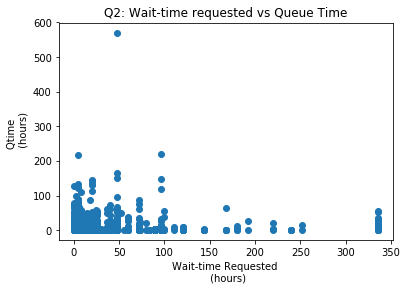

In [54]:
plt.scatter(y=qtime_ramreq['hour'], x=accre_q2['total_hours'])
plt.xlabel("Wait-time Requested \n (hours)")
plt.ylabel("Qtime \n (hours)")
plt.title("Q2: Wait-time requested vs Queue Time");
plt.show()

## Question 3: Are there nodes that fail more often than others? ** ignore cases where multiple nodes are used?


In [55]:
accre_q3 = accre.drop(columns=['JobID', 'JobIDRaw', 'Cluster', 'Partition', 'Account', 'Group', 'GID',
       'User', 'UID', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed',
       'ExitCode', 'NNodes', 'NCPUS', 'ReqCPUS', 'ReqMem', 'ReqGRES',
       'ReqTRES', 'Timelimit', 'JobName'])
accre_q3.head()

,State,NodeList
0,COMPLETED,vmp1085
1,COMPLETED,vmp1099
2,COMPLETED,vmp1126
3,COMPLETED,vmp230
4,COMPLETED,vmp1242


In [56]:
accre_nodefail = accre_q3.loc[accre_q3['State'] == 'NODE_FAIL']
accre_nodefail.head(10)

,State,NodeList
22163,NODE_FAIL,vmp1342
22166,NODE_FAIL,vmp1055
22167,NODE_FAIL,vmp1043
22204,NODE_FAIL,vmp1342
22205,NODE_FAIL,vmp1342
22206,NODE_FAIL,vmp1342
22207,NODE_FAIL,vmp1342
22208,NODE_FAIL,vmp1342
22209,NODE_FAIL,vmp1342
22210,NODE_FAIL,vmp1342


In [57]:
most_frequent_nodeFail = accre_nodefail["NodeList"].value_counts(sort=True);
most_frequent_nodeFail.head(20)


vmp1354    31
vmp1350    24
vmp1352    22
vmp1347    18
vmp1349    17
vmp1374    16
vmp1339    16
vmp1351    14
vmp1342    14
vmp425     13
vmp1333    11
vmp1331    11
vmp1223    11
vmp1343    11
vmp205     11
vmp301     11
vmp211     11
vmp209     10
vmp203     10
vmp1225    10
Name: NodeList, dtype: int64

In [58]:
writer = pd.ExcelWriter('mostfrequentnodefailed.xlsx')
most_frequent_nodeFail.to_excel(writer, 'sheet1')
writer.save()

## 4) Are there users who are clogging up the flow by running too many small jobs? Greater than 500 jobs, each less than 5 minutes, within 4 hours

In [59]:
accre_q4 = accre.drop(columns=['JobID', 'JobIDRaw', 'Cluster', 'Partition', 'Account', 'Group', 'GID',
                               'UID', 'Eligible', 'Elapsed',
       'ExitCode', 'NNodes', 'NCPUS', 'ReqCPUS', 'State', 'NodeList', 'ReqMem', 'ReqGRES',
       'ReqTRES', 'Timelimit', 'JobName'])
accre_q4.head()

,User,Submit,Start,End
0,masispider,2017-07-02T00:40:58,2017-07-03T02:13:59,2017-07-04T03:19:20
1,masispider,2017-07-02T00:40:58,2017-07-03T02:20:08,2017-07-04T02:11:55
2,masispider,2017-07-02T00:40:58,2017-07-03T02:41:13,2017-07-04T04:41:04
3,masispider,2017-07-02T00:40:58,2017-07-03T02:51:53,2017-07-04T10:54:13
4,uscms010,2017-07-01T05:00:00,2017-07-01T05:00:01,2017-07-01T05:00:11


In [60]:
accre_q4['Jobsize'] = pd.to_datetime(accre_q4['End']) - pd.to_datetime(accre_q4['Start'])
accre_q4.head()

,User,Submit,Start,End,Jobsize
0,masispider,2017-07-02T00:40:58,2017-07-03T02:13:59,2017-07-04T03:19:20,1 days 01:05:21
1,masispider,2017-07-02T00:40:58,2017-07-03T02:20:08,2017-07-04T02:11:55,0 days 23:51:47
2,masispider,2017-07-02T00:40:58,2017-07-03T02:41:13,2017-07-04T04:41:04,1 days 01:59:51
3,masispider,2017-07-02T00:40:58,2017-07-03T02:51:53,2017-07-04T10:54:13,1 days 08:02:20
4,uscms010,2017-07-01T05:00:00,2017-07-01T05:00:01,2017-07-01T05:00:11,0 days 00:00:10


In [61]:
accre_q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12499389 entries, 0 to 12499388
Data columns (total 5 columns):
User       object
Submit     object
Start      object
End        object
Jobsize    timedelta64[ns]
dtypes: object(4), timedelta64[ns](1)
memory usage: 476.8+ MB


In [62]:
#accre_q4.query('Jobsize == "0 days 00:05:00"')

accre_5min = accre_q4[accre_q4['Jobsize'] < "0 days 00:05:00"]
accre_5min.head(10)

,User,Submit,Start,End,Jobsize
4,uscms010,2017-07-01T05:00:00,2017-07-01T05:00:01,2017-07-01T05:00:11,00:00:10
5,autocms,2017-07-01T05:00:01,2017-07-01T05:00:04,2017-07-01T05:03:22,00:03:18
6,tuos,2017-07-01T05:00:02,2017-07-01T05:00:04,2017-07-01T05:02:07,00:02:03
7,uscms010,2017-07-01T05:00:22,2017-07-01T05:00:23,2017-07-01T05:00:33,00:00:10
8,autocms,2017-07-01T05:01:01,2017-07-01T05:01:02,2017-07-01T05:05:49,00:04:47
9,tuos,2017-07-01T05:01:02,2017-07-01T05:01:05,2017-07-01T05:04:17,00:03:12
31,vuiiscci,2017-07-01T05:01:26,2017-07-01T13:51:49,2017-07-01T13:51:49,00:00:00
33,vuiiscci,2017-07-01T05:01:26,2017-07-01T14:03:05,2017-07-01T14:03:05,00:00:00
34,uscms010,2017-07-01T05:01:56,2017-07-01T05:01:56,2017-07-01T05:03:56,00:02:00
35,autocms,2017-07-01T05:02:02,2017-07-01T05:02:02,2017-07-01T05:04:53,00:02:51


In [63]:
accre_5min.shape

(7708907, 5)

In [64]:
frequent_user = accre_5min["User"].value_counts(ascending=False);
frequent_user.head()

cmsglidein    3335001
sotocs         635622
autocms        424980
cmslocal       359112
uscms010       257928
Name: User, dtype: int64

In [66]:
group = accre_5min.groupby(by='Submit', axis=0)

In [69]:
group.head()

,User,Submit,Start,End,Jobsize
4,uscms010,2017-07-01T05:00:00,2017-07-01T05:00:01,2017-07-01T05:00:11,00:00:10
5,autocms,2017-07-01T05:00:01,2017-07-01T05:00:04,2017-07-01T05:03:22,00:03:18
6,tuos,2017-07-01T05:00:02,2017-07-01T05:00:04,2017-07-01T05:02:07,00:02:03
7,uscms010,2017-07-01T05:00:22,2017-07-01T05:00:23,2017-07-01T05:00:33,00:00:10
8,autocms,2017-07-01T05:01:01,2017-07-01T05:01:02,2017-07-01T05:05:49,00:04:47
9,tuos,2017-07-01T05:01:02,2017-07-01T05:01:05,2017-07-01T05:04:17,00:03:12
31,vuiiscci,2017-07-01T05:01:26,2017-07-01T13:51:49,2017-07-01T13:51:49,00:00:00
33,vuiiscci,2017-07-01T05:01:26,2017-07-01T14:03:05,2017-07-01T14:03:05,00:00:00
34,uscms010,2017-07-01T05:01:56,2017-07-01T05:01:56,2017-07-01T05:03:56,00:02:00
35,autocms,2017-07-01T05:02:02,2017-07-01T05:02:02,2017-07-01T05:04:53,00:02:51
